In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Diamond=pd.read_csv("C:\\Users\\debra\\PYTHON FOLDER\\Class Notes\\datasets\\Regression Datasets\\DiamondPricesData.csv")

# Basic Data Exploration

In [3]:
Diamond.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [4]:
Diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53934 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53926 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
Diamond.describe(include='all')

,price,carat,cut,color,clarity,depth,table,x,y,z
count,53940.000000,53940.000000,53940,53934,53940,53926.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11286,13065,NaN,NaN,NaN,NaN,NaN
mean,3932.799722,0.797940,NaN,NaN,NaN,61.749479,57.457184,5.731157,5.734526,3.538734
std,3989.439738,0.474011,NaN,NaN,NaN,1.432661,2.234491,1.121761,1.142135,0.705699
min,326.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.040000


In [10]:
Diamond.nunique()

price      11602
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            554
y            552
z            375
dtype: int64

In [99]:
categorical_variables=['cut', 'color', 'clarity']
continous_variables=['price', 'carat', 'depth', 'table', 'x', 'y', 'z']

# Results of basic exploratory data analysis
We sort out the type of the variables :-
* price is continous . This is our TARGET variable
* carat is categorical
* cut   is categorical
* color is categorical
* clarity is continous
* depth   is continous
* table   is continous
* x       is continous
* y       is continous
* z       is continous


# Now we want to see the distribution of the categorical variables. To do that we need to plot histograms

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

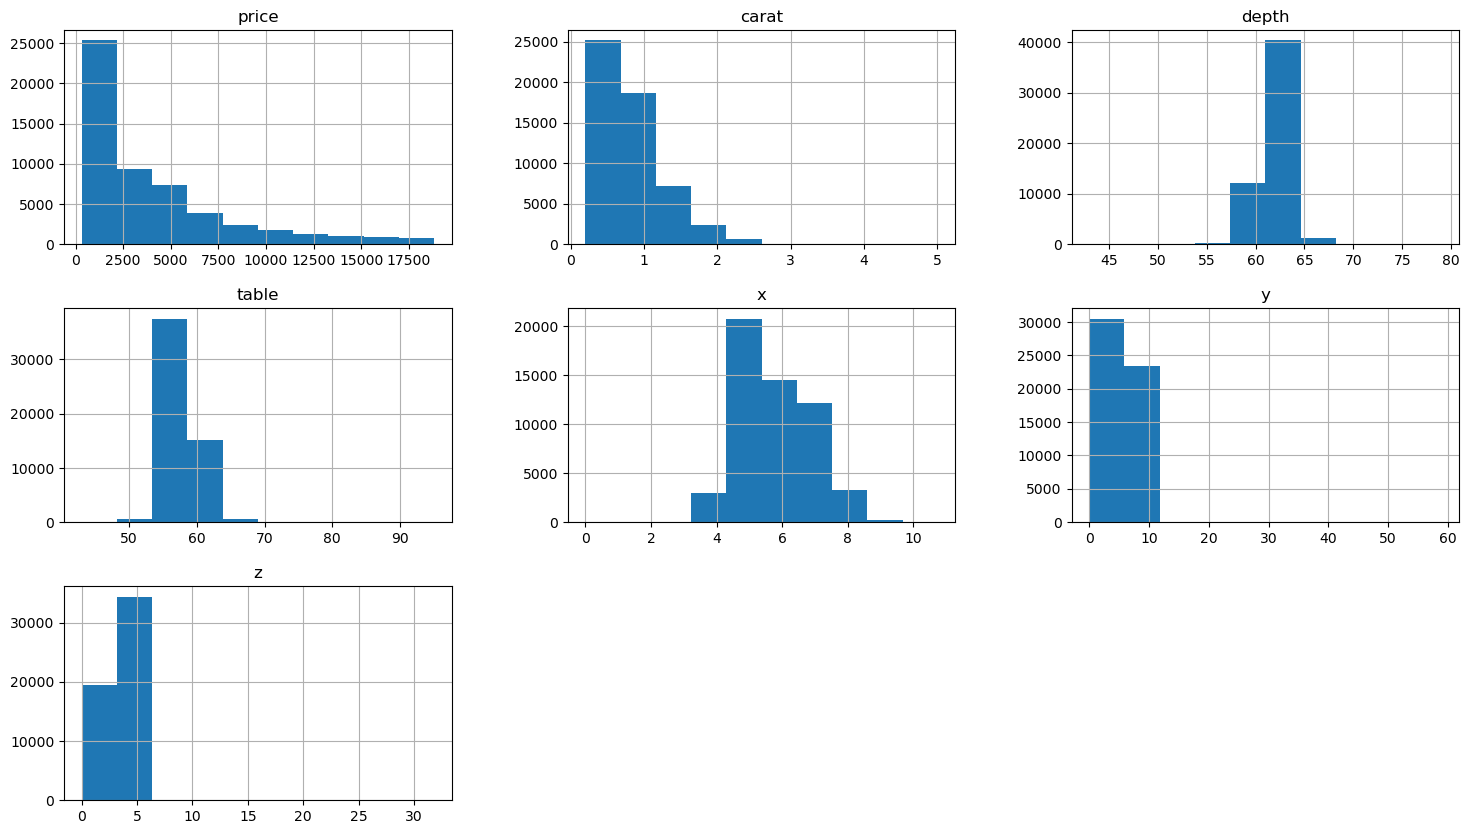

In [19]:
Diamond[continous_variables].hist(figsize=(18,10))

# Based on the histograms, we can see the distribution of the continuous variables and conclude the following:

* **Price** is selected due to its good distribution.
* **Carat** is selected due to its good distribution.
* **Depth** is selected due to its good distribution.
* **Table** is selected due to its good distribution.
* **X** (length) is selected due to its good distribution.
* **Y** (width) is selected due to its good distribution.
* **Z** (depth) is selected due to its good distribution.

This selection indicates that all these variables have well-distributed data, making them suitable for further analysis.

# Now we need to check the distribution of the categorical variables using bar plots

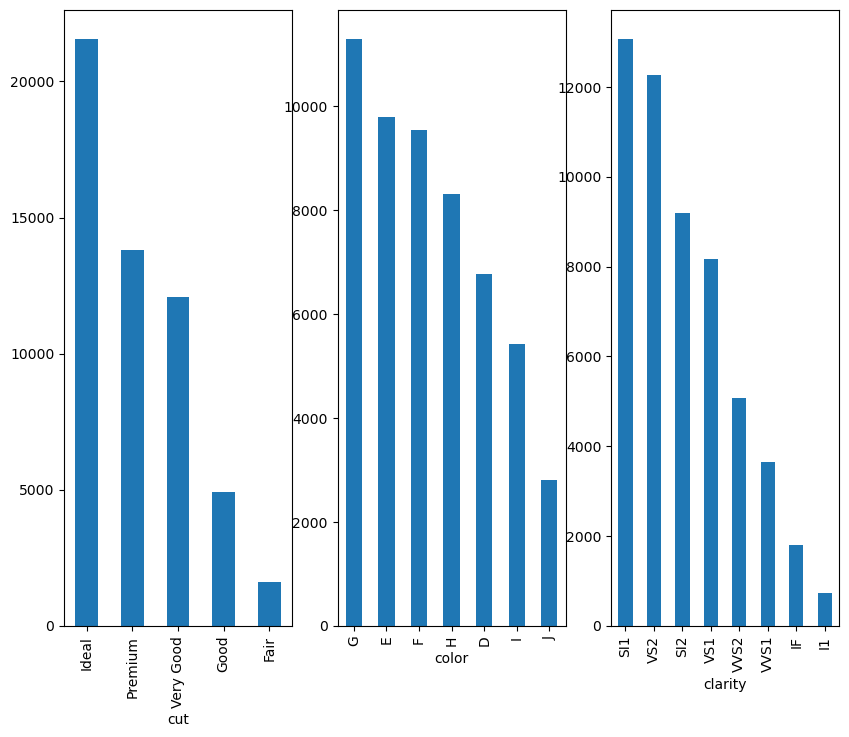

In [38]:
fig, subplot= plt.subplots(nrows=1, ncols=len(categorical_variables), figsize=(10,8))
for i,j in zip(categorical_variables,range(len(categorical_variables))):
    Diamond[i].value_counts().plot(kind='bar',ax=subplot[j])

# Based on the bar charts, we can see the distribution of the continuous variables and conclude the following::-

* **cut** is selected due to its good distribution
* **color** is selected due to its good distribution
* **clarity** is selected dur to its good distribution

This selection indicates that all these variables have well-distributed data, making them suitable for further analysis.

# Checking for missing values

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64


<Axes: >

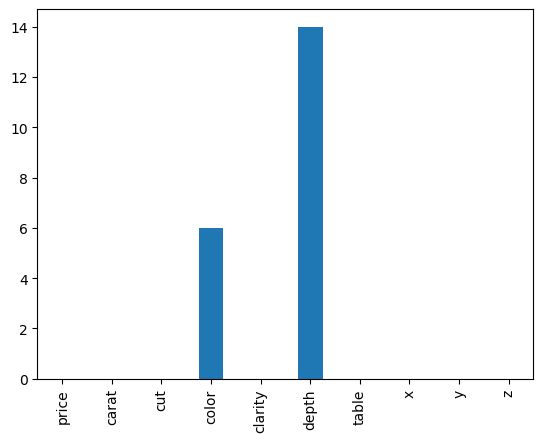

In [40]:
# now we check for missing values
print(Diamond.isnull().sum())
Diamond.isnull().sum().plot(kind='bar')

In [ ]:
# We see that depth and colr has missing values

In [41]:
Diamond['depth'].mean()

61.749478915550945

In [44]:
Diamond['depth'].fillna(value=Diamond['depth'].mean(), inplace=True)

In [46]:
Diamond['color'].mode()[0]

'G'

In [47]:
Diamond['color'].fillna(value=Diamond['color'].mode()[0], inplace=True)

In [48]:
Diamond.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

# Here we replaced all the missing values with thier mean and modes.
* For depth we replaced the missing values with its mean
* For color we replaced the missing values with its mode

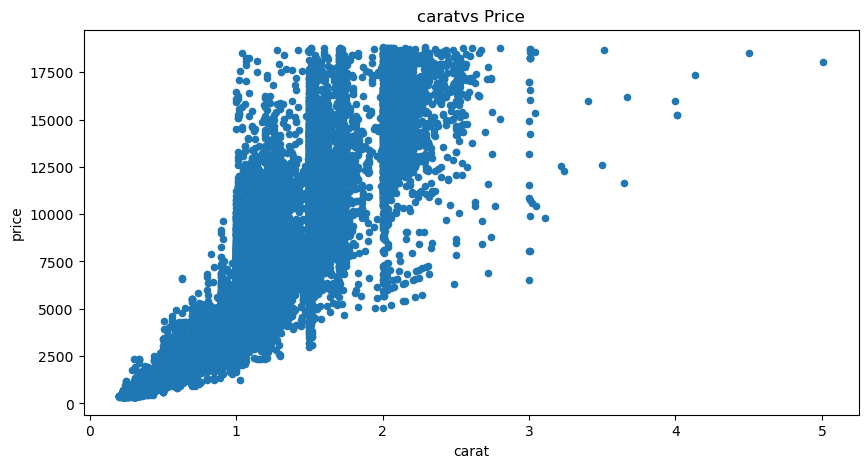

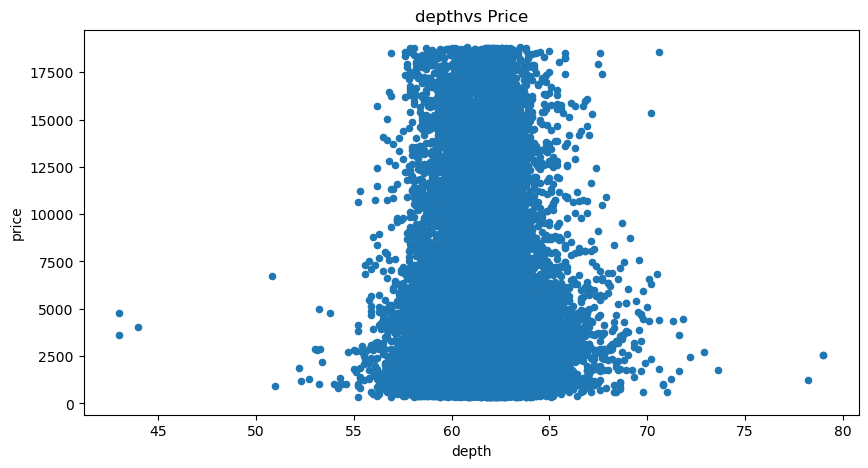

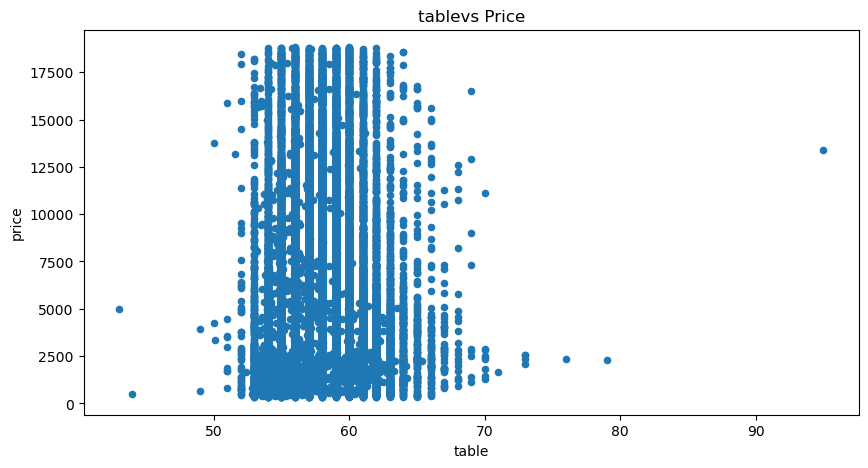

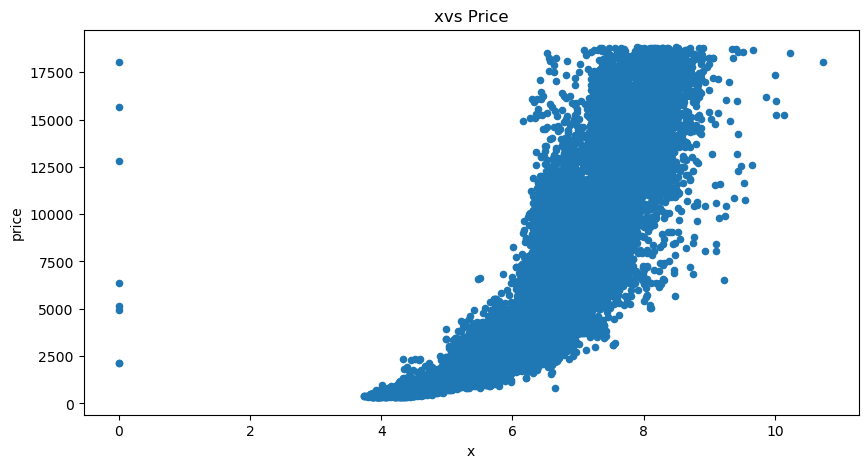

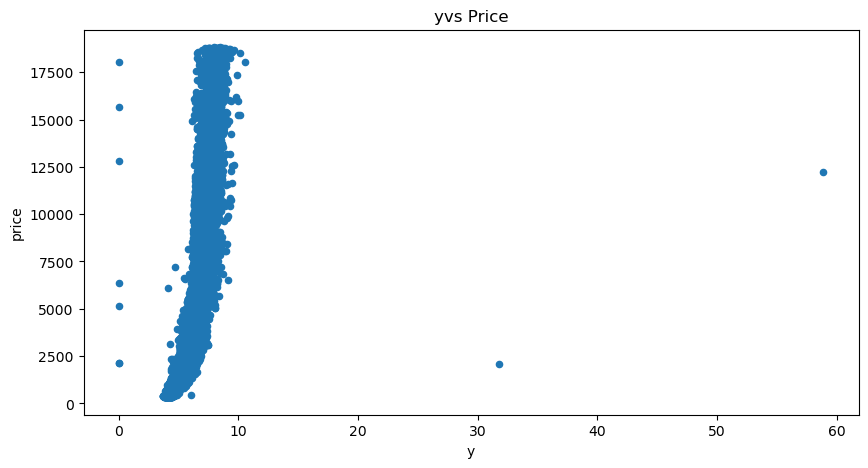

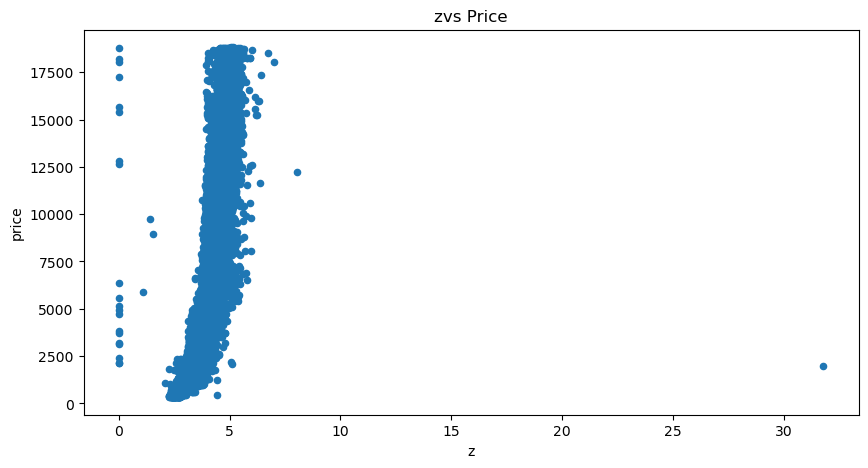

In [53]:
# Now we need to check the correlation between price and other continous variables 

#WE can do that by first 
cols_to_plot=['carat', 'depth', 'table', 'x', 'y', 'z']
for i in cols_to_plot:
    Diamond.plot.scatter(x=i,y='price', figsize=(10,5), title=i + "vs Price")

In [ ]:
# except table and depth other variables seems to have correlation with price from teh scatter diagrams
# we can confirm it by seeing thier corelation coefficients

In [54]:
Correlation_Matrix = Diamond[continous_variables].corr()
print(Correlation_Matrix)

          price     carat     depth     table         x         y         z
price  1.000000  0.921591 -0.010646  0.127134  0.884435  0.865421  0.861249
carat  0.921591  1.000000  0.028246  0.181618  0.975094  0.951722  0.953387
depth -0.010646  0.028246  1.000000 -0.295671 -0.025242 -0.029294  0.094961
table  0.127134  0.181618 -0.295671  1.000000  0.195344  0.183760  0.150929
x      0.884435  0.975094 -0.025242  0.195344  1.000000  0.974701  0.970772
y      0.865421  0.951722 -0.029294  0.183760  0.974701  1.000000  0.952006
z      0.861249  0.953387  0.094961  0.150929  0.970772  0.952006  1.000000


In [55]:
Correlation_Matrix['price'][abs(Correlation_Matrix['price'])>0.5]

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

# Results of the feature selection for continous variables
* We see that from the scatter plots that Depth and table has no visible relationship which was indicating in price having very low correlation with them.
* This was further confirmed by the correlation matrix which shows that there was indeed very low correlation with those two variables meanwhile karat and the dimensions of the diamond i.e x , y , z had significant correlation
* Hence we select the following continous variables for our machine learning model:-
* carat
* x
* y
* z

In [56]:
# Now we check for correlation with the categorical variables

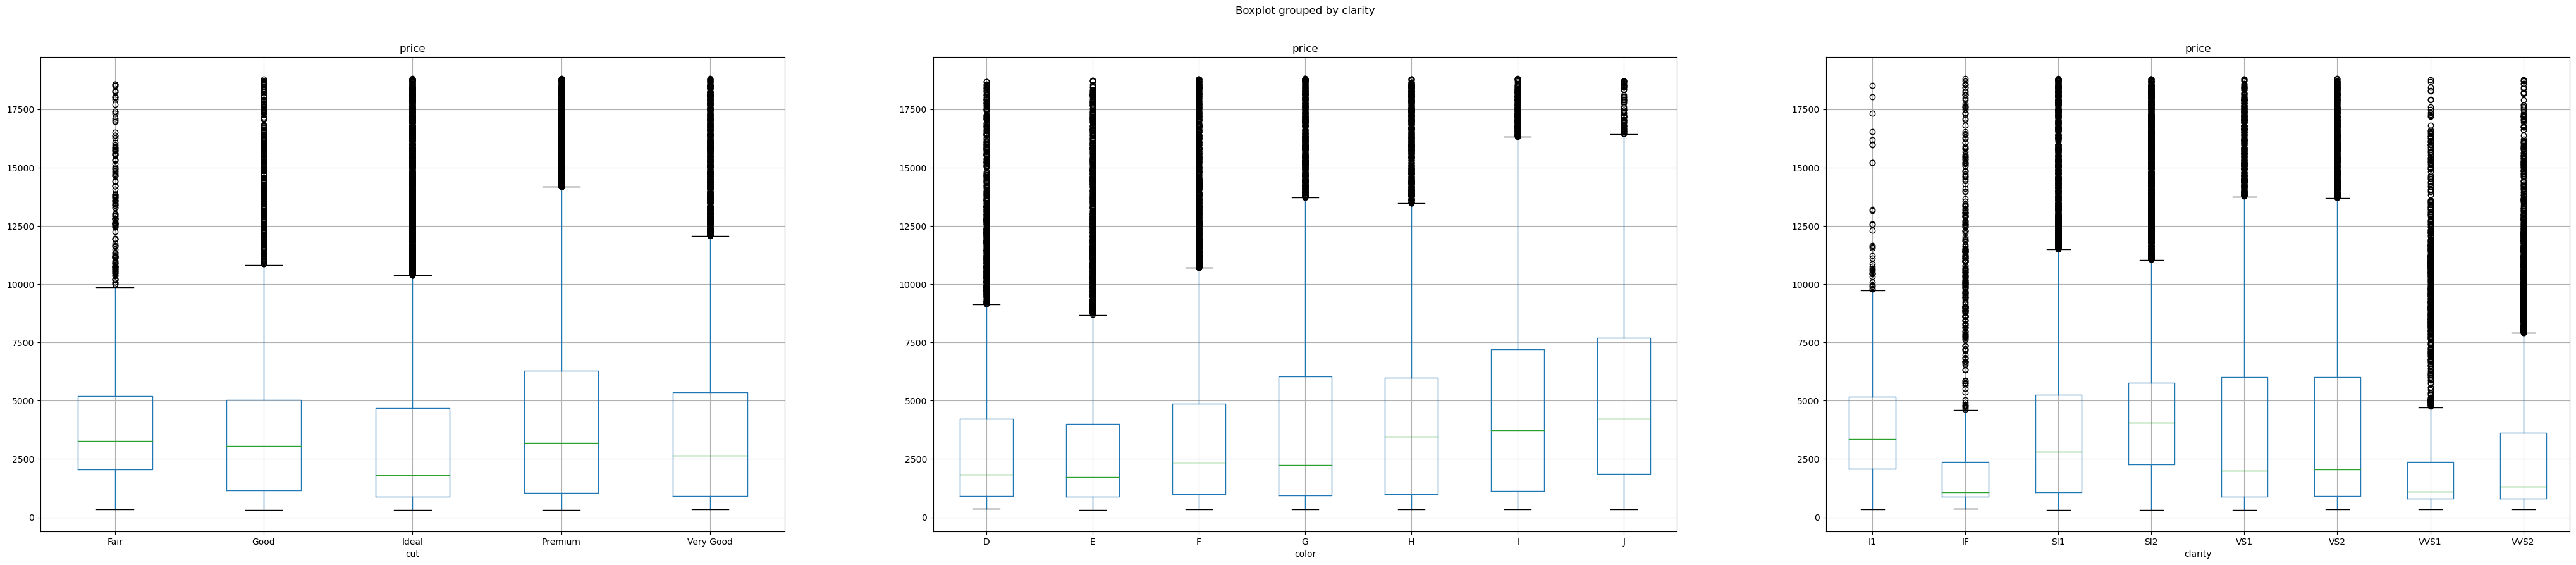

In [69]:
fig, subplot=plt.subplots(nrows=1, ncols=len(categorical_variables), figsize=(50,10))

for i, j in zip(categorical_variables,range(len(categorical_variables))):
    Diamond.boxplot(column='price', by=i, vert=True, figsize=(5,5), ax=subplot[j]) 

In [70]:
# The categorical variables might have correlation with price as we can infer from the boxplot

In [71]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [72]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=categorical_variables
FunctionAnova(inpData=Diamond, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

cut is correlated with price | P-Value: 8.42830730759452e-150
color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 1.9190895e-316


['cut', 'color', 'clarity']

# Result of feature selection of categorical variables
After analysis the box plot and the anova results we can conclude:
* cut is correlated with price
* color is correlated with price
* clarity is correlated with price

# Final variables selected for the Machine Learning model are:-
* carat
* x
* y
* z
* cut 
* color 
* clarity 


In [74]:
Selected_columns=['carat','x','y','z','cut','color','clarity']

DataForML = Diamond[Selected_columns]
DataForML.head()

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,3.89,3.84,2.31,Premium,E,SI1
2,0.23,4.05,4.07,2.31,Good,E,VS1
3,0.29,4.20,4.23,2.63,Premium,I,VS2
4,0.31,4.34,4.35,2.75,Good,J,SI2


In [76]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [77]:
DataForML=pd.read_pickle('DataForML.pkl')
DataForML.head()

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,3.89,3.84,2.31,Premium,E,SI1
2,0.23,4.05,4.07,2.31,Good,E,VS1
3,0.29,4.20,4.23,2.63,Premium,I,VS2
4,0.31,4.34,4.35,2.75,Good,J,SI2


# Data Preprocessing for ML

In [79]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['price']=Diamond['price']

DataForML_Numeric.head(20)

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.23,3.95,3.98,2.43,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,326
1,0.21,3.89,3.84,2.31,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,326
2,0.23,4.05,4.07,2.31,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,327
3,0.29,4.20,4.23,2.63,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,334
4,0.31,4.34,4.35,2.75,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,335
5,0.24,3.94,3.96,2.48,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,336
6,0.24,3.95,3.98,2.47,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,336
7,0.26,4.07,4.11,2.53,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,337
8,0.22,3.87,3.78,2.49,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,337
9,0.23,4.00,4.05,2.39,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,338


In [80]:
DataForML_Numeric.columns

Index(['carat', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

# Splitting the dataset into train and test

In [82]:
TargetVariable='price'
Predictors=['carat', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'price']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31)

# Quick check on the shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37758, 25)
(37758,)
(16182, 25)
(16182,)


In [85]:
# Suppressing Scientific Notation in printing numpy arrays
np.set_printoptions(suppress=True)

In [84]:
y_train[0:10]

array([2676,  445,  816, 9016,  844, 5713,  478,  447, 8656, 2111],
      dtype=int64)

In [86]:
X_train[0:10]

array([[0.7, 5.8, 5.83, 3.44, False, False, False, False, True, False,
        False, False, True, False, False, False, False, False, False,
        False, True, False, False, False, 2676],
       [0.33, 4.39, 4.43, 2.77, False, False, False, False, True, False,
        False, False, False, False, True, False, False, False, True,
        False, False, False, False, False, 445],
       [0.31, 4.41, 4.43, 2.63, False, False, True, False, False, False,
        False, False, True, False, False, False, False, False, False,
        False, False, False, True, False, 816],
       [1.23, 7.02, 6.94, 4.16, False, False, False, True, False, False,
        False, True, False, False, False, False, False, False, False,
        False, False, True, False, False, 9016],
       [0.3, 4.35, 4.33, 2.68, False, False, True, False, False, False,
        True, False, False, False, False, False, False, False, False,
        False, False, True, False, False, 844],
       [1.01, 6.38, 6.31, 4.03, False, False, 

# Multiple Linear Regression Model

In [98]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)


# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) 
print('Median Accuracy on test data:', MedianAccuracy)


def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=5, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 1.0

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice  APE
0   4921          4921.0  0.0
1    967           967.0  0.0
2   3301          3301.0  0.0
3   5337          5337.0  0.0
4   4034          4034.0  0.0
Mean Accuracy on test data: 100.0
Median Accuracy on test data: 100.0

Accuracy values for 10-fold Cross Validation:
 [100. 100. 100. 100. 100.]

Final Average Accuracy of the model: 100.0


# Plotting the best fit line in terms of carat

In [95]:
TestingDataResults['PriceAVG']=TestingDataResults['price'].mean()
TestingDataResults.head()

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price,Predictedprice,APE,PriceAVG
0,1.01,6.53,6.47,3.9,False,False,False,True,False,False,...,False,True,False,False,False,False,4921,4923.0,0.040642,3952.823755
1,0.35,4.55,4.53,2.81,False,False,True,False,False,False,...,False,False,False,False,True,False,967,963.0,0.413650,3952.823755
2,0.73,5.76,5.82,3.6,False,False,True,False,False,False,...,False,False,False,False,False,False,3301,3309.0,0.242351,3952.823755
3,1.03,6.4,6.49,4.03,False,False,True,False,False,False,...,True,False,False,False,False,False,5337,5336.0,0.018737,3952.823755
4,0.9,6.25,6.29,3.77,False,False,False,False,True,False,...,True,False,False,False,False,False,4034,4042.0,0.198314,3952.823755


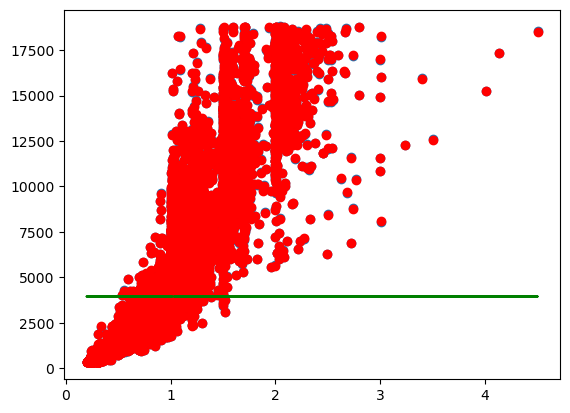

In [97]:
# Visualizing the line of best fit
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=TestingDataResults['carat'] , y=TestingDataResults['price'])
plt.scatter(TestingDataResults['carat'] ,TestingDataResults['Predictedprice'], color='red')
plt.plot(TestingDataResults['carat'] ,TestingDataResults['PriceAVG'], color='green')